In [24]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
p='E:/Onedrive - Lancaster University/Datarepo/szekelydata/klima/'

In [26]:
stations=pd.read_csv(p+'stations.csv')
stations=stations.set_index('ID')
stations.to_csv('data/stations.csv')

0: NoCloud
1: Cloud
4: Fog
6: Rain
7: Snow
11: Hail

In [27]:
weather={
2:1,
3:7,
5:6,
8:6,
9:6,
100:0,
101:0,
102:0,
103:0,
104:0,
105:0,
106:0,
107:0,
108:0,
109:0,
110:4,
111:4,
112:4,
113:1,
114:6,
115:6,
116:6,
117:6,
118:6,
119:1,
120:7,
121:6,
122:7,
123:6,
124:11,
125:6,
126:7,
127:11,
128:4,
129:6,
130:1,
131:1,
132:1,
133:1,
134:1,
135:1,
136:7,
137:7,
138:7,
139:7,
140:4,
141:4,
142:4,
143:4,
144:4,
145:4,
146:4,
147:4,
148:4,
149:4,
150:6,
151:6,
152:6,
153:6,
154:6,
155:6,
156:6,
157:6,
158:6,
159:6,
160:6,
161:6,
162:6,
163:6,
164:6,
165:6,
166:11,
167:11,
168:6,
169:6,
170:7,
171:7,
172:7,
173:7,
174:7,
175:7,
176:7,
177:7,
178:7,
179:7,
180:6,
181:6,
182:6,
183:7,
184:7,
185:7,
186:7,
187:7,
188:7,
189:11,
190:11,
191:6,
192:6,
193:7,
194:7,
195:6,
196:11,
197:6,
198:1,
199:11}

In [28]:
measures=['XTEMP','XSPD','XPCP','XSD','XVSB','YFOG','YPCP','YSNW','YHAL']
ycolumns={1:'YCLD',4:'YFOG',6:'YPCP',7:'YSNW',10:'YCLR',11:'YHAL'}

In [29]:
def load_data(stn,d='high_res',p=p,stations=stations,verbose=True):
    if verbose:
        print('loading...',stn,stations.loc[int(stn)]['LOC'],d)
    df=pd.read_csv(p+'/'+d+'/export/'+stn+'.csv',dtype={' FRSHTT':str})
    df.columns=[i.strip() for i in df.columns]
    df['time']=pd.to_datetime(df['time'])
    df['XTEMP']=(pd.to_numeric(df['TEMP'], errors='coerce').replace(9999.9,np.nan)-32)*5/9 #Fahrenheit to Celsiu
    if d=='high_res':
        df['XSPD']=pd.to_numeric(df['SPD'], errors='coerce')*1.61 #MPH to Km/h
        df['XVSB']=(pd.to_numeric(df['VSB'], errors='coerce')*1.61).apply(lambda x: min(x,10)) #miles to Km, max VSB=20Km
        df['XPCP']=pd.to_numeric(df['PCP06'], errors='coerce')*25.4 #inch to mm
        df['XSD']=pd.to_numeric(df['SD'], errors='coerce')*25.4 #inch to mm
        
        df['PCP01']=pd.to_numeric(df['PCP01'], errors='coerce')
        df['PCP06']=pd.to_numeric(df['PCP06'], errors='coerce')
        df['PCP24']=pd.to_numeric(df['PCP24'], errors='coerce')
        df['PCPXX']=pd.to_numeric(df['PCPXX'], errors='coerce')
        df['PCP06'].loc[~df['PCP06'].isnull()] = 6
        df['PCPXX'].loc[~df['PCPXX'].isnull()] = 6
        df['PCP01'].loc[~df['PCP01'].isnull()] = 6
        df['PCP24'].loc[~df['PCP24'].isnull()] = 6
        df['AW']=pd.to_numeric(df['AW'], errors='coerce')+100
        df['MW']=pd.to_numeric(df['MW'], errors='coerce')+100
        df['W']=pd.to_numeric(df['W'], errors='coerce')
        dz=df[['PCP01','PCP06','PCP24','PCPXX','AW','MW','W']]
        df['W']=dz.ffill(axis=1)['W'].replace(weather).replace(0,10)
        dz=df.groupby(['time','W']).count()['TEMP'].unstack().fillna(0)
        dz.columns=[ycolumns[i] for i in dz.columns]
        df=df.set_index('time').join(dz).reset_index()
    else:
        df['year']=df['time'].dt.year
        df['month']=df['time'].dt.month
        df['day']=df['time'].dt.day
        df['hour']=df['time'].dt.hour
        df['XSPD']=pd.to_numeric(df['WDSP'], errors='coerce').replace(999.9,np.nan)*1.85 #knots to Km/h
        df['XVSB']=(pd.to_numeric(df['VISIB'], errors='coerce').replace(999.9,np.nan)*1.61).apply(lambda x: min(x,10)) #miles to Km, max VSB=20Km
        df['XPCP']=pd.to_numeric(df['PRCP'].str[:-1], errors='coerce').replace(99.99,np.nan)*25.4 #inch to mm
        df['XSD']=pd.to_numeric(df['SNDP'], errors='coerce').replace(999.9,np.nan)*25.4 #inch to mm
        
        df['YFOG']=pd.to_numeric(df['FRSHTT'].str[0], errors='coerce')
        df['YPCP']=pd.to_numeric(df['FRSHTT'].str[1], errors='coerce')
        df['YSNW']=pd.to_numeric(df['FRSHTT'].str[2], errors='coerce')
        df['YHAL']=pd.to_numeric(df['FRSHTT'].str[3], errors='coerce')
    for m in measures:
        if m not in df.columns:
            df[m]=np.nan
    return df[['time','year','month','day','hour']+measures].set_index('time')

In [78]:
# stn='154200' #aurel vlaicu
stn='151700' #mciuc
daily=load_data(stn,'daily')
hires=load_data(stn,'high_res')

loading... 151700 MIERCUREA CIUC daily
loading... 151700 MIERCUREA CIUC high_res


In [82]:
def comparison_getter(measure,daily=daily,hires=hires):
    if type(measure)!=list:
        measure=[measure]
        
    d=daily[measure]
    h=hires.groupby(['year','month','day','hour']).mean()[measure]
    ymeasures=[m for m in measure if 'Y' in m]
    h[ymeasures]=h[ymeasures][h[ymeasures]==0].fillna(1)
    h=h.reset_index()
    h['time']=pd.to_datetime(dict(year=h['year'], month=h['month'], day=h['day'], hour=h['hour'])).values
    h=h.set_index('time')[measure]
    return d,h

def comaprison_plotter(measure,daily=daily,hires=hires):
    d,h=comparison_getter(measure,daily,hires)
    d.columns=['d']
    h.columns=['h']
    x=h.join(d,how='outer').dropna()
    x['diff']=(x['h']-x['d'])
    fig,ax=plt.subplots(1,3,figsize=(15,4))
    x['diff'].plot(ax=ax[0],title='diff')
    x['h'].plot(ax=ax[1],title='high res')
    x['d'].plot(ax=ax[2],title='daily')
    return x,d,h

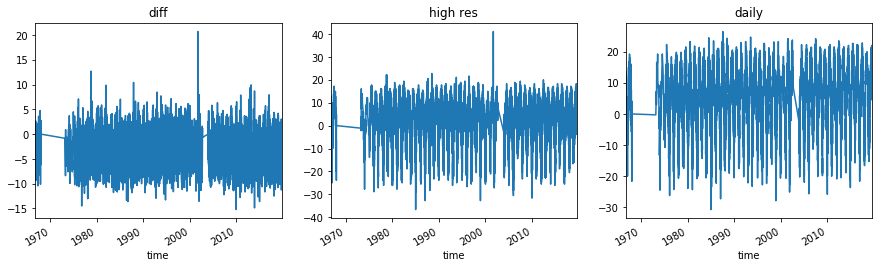

In [83]:
comaprison_plotter('XTEMP');

In [84]:
comaprison_plotter('XSPD');

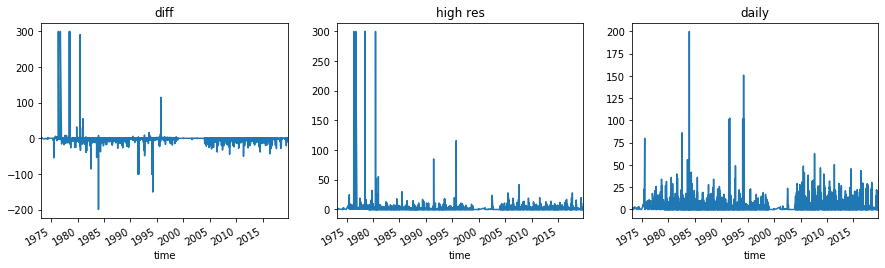

In [85]:
x,d,h=comaprison_plotter('XPCP')

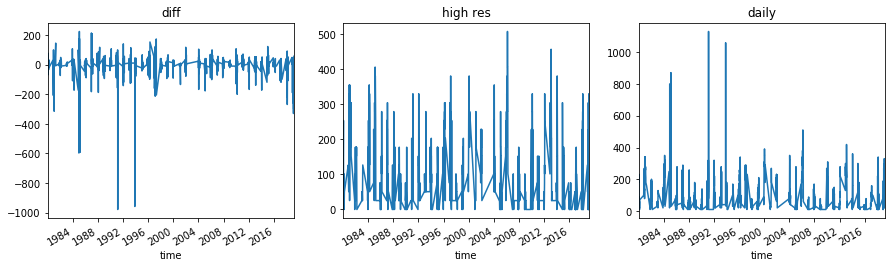

In [86]:
x,d,h=comaprison_plotter('XSD');

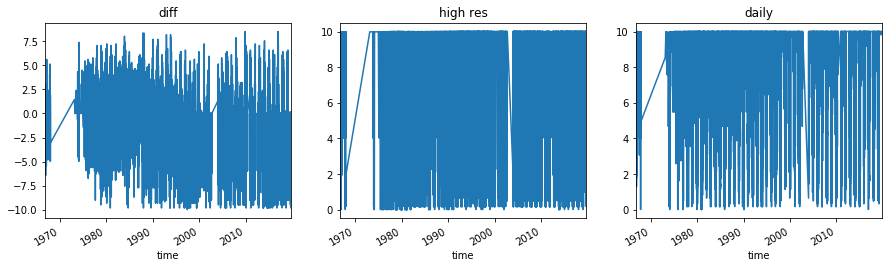

In [87]:
x,d,h=comaprison_plotter('XVSB');

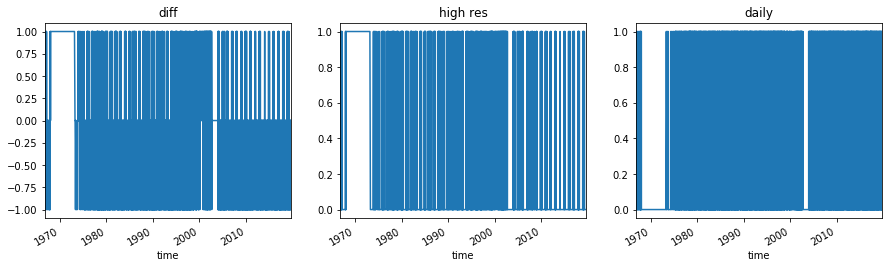

In [88]:
x,d,h=comaprison_plotter('YSNW');

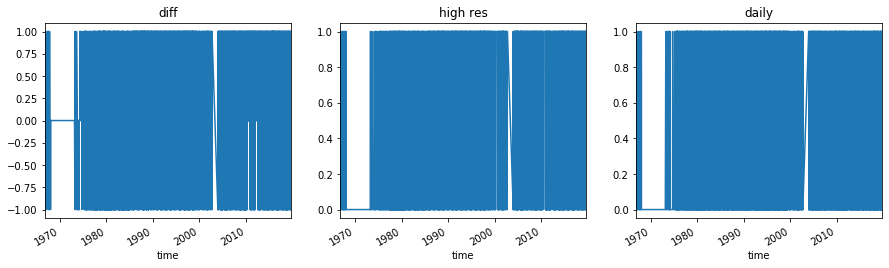

In [89]:
x,d,h=comaprison_plotter('YPCP');

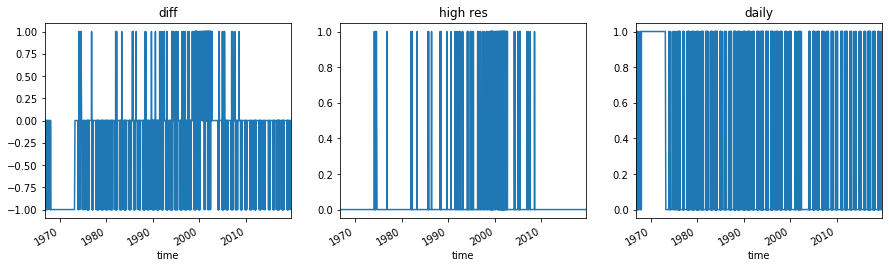

In [90]:
x,d,h=comaprison_plotter('YHAL');

In [91]:
hu=['127720',
'128050',
'128120',
'128220',
'128250',
'128300',
'128390',
'128430',
'128510',
'128600',
'128820',
'128920',
'129100',
'129150',
'129420',
'129600',
'129700',
'129820',
'129920',
'129350']
ro=['150040',
'150100',
'150140',
'150150',
'150200',
'150230',
'150800',
'150850',
'150900',
'151080',
'151200',
'151450',
'151500',
'151700',
'151970',
'152000',
'152300',
'152350',
'152470',
'152600',
'152800',
'152920',
'153100',
'153350',
'153460',
'153500',
'153600',
'154100',
'154200',
'154210',
'154500',
'154600',
'154700',
'154800',
'154810',
'154990']

In [123]:
import os
hu=[i[:-4] for i in os.listdir(p+'/high_res/export') if int(i[:-4])<140000]
ro=[i[:-4] for i in os.listdir(p+'/high_res/export') if int(i[:-4])>140000]

In [124]:
hs=[]
ds=[]
for stn in ro:
    try:
        d_ok=True
        daily=load_data(stn,'daily')
    except:
        d_ok=False
        print('failed')
    try:
        h_ok=True
        hires=load_data(stn,'high_res')
    except:
        h_ok=False
        print('failed')
    d,h=comparison_getter(measures,daily,hires)
    d['ID']=stn
    h['ID']=stn
    if d_ok: ds.append(d)
    if h_ok: hs.append(h)
ds=pd.concat(ds)
hs=pd.concat(hs)

loading... 150000 DARABANI daily
loading... 150000 DARABANI high_res


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


loading... 150001 BOBOC AIR BASE daily
loading... 150001 BOBOC AIR BASE high_res
loading... 150002 BORCEA FETESTI AIR BASE daily
loading... 150002 BORCEA FETESTI AIR BASE high_res
loading... 150010 AVRAMENI daily
loading... 150010 AVRAMENI high_res
loading... 150040 SIGHETUL MARMATIEI daily
loading... 150040 SIGHETUL MARMATIEI high_res
loading... 150070 RADAUTI daily
loading... 150070 RADAUTI high_res
loading... 150090 DOROHOI daily
loading... 150090 DOROHOI high_res
loading... 150100 SATU MARE daily
loading... 150100 SATU MARE high_res
loading... 150105 BAIA MARE/MAGHERUSI daily
loading... 150105 BAIA MARE/MAGHERUSI high_res
loading... 150140 TAUTII MAGHERAUS daily
loading... 150140 TAUTII MAGHERAUS high_res
loading... 150150 OCNA SUGATAG daily
loading... 150150 OCNA SUGATAG high_res
loading... 150200 BOTOSANI daily
loading... 150200 BOTOSANI high_res
loading... 150230 STEFAN CEL MARE daily
loading... 150230 STEFAN CEL MARE high_res
loading... 150235 SUCEAVA/SALCEA daily
loading... 15

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (12,22,23,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


loading... 151680 ODORHEIUL SECUIESC daily
loading... 151680 ODORHEIUL SECUIESC high_res
loading... 151700 MIERCUREA CIUC daily
loading... 151700 MIERCUREA CIUC high_res
loading... 151740 ONCESTI daily
loading... 151740 ONCESTI high_res
loading... 151790 SIRIA daily
loading... 151790 SIRIA high_res
loading... 151820 GURAHONT daily
loading... 151820 GURAHONT high_res
loading... 151840 ROSIA MONTANA daily
loading... 151840 ROSIA MONTANA high_res
loading... 151890 DUMBRAVENI daily
loading... 151890 DUMBRAVENI high_res
loading... 151940 TARGU OCNA daily
loading... 151940 TARGU OCNA high_res
loading... 151970 BARLAD daily
loading... 151970 BARLAD high_res
loading... 151990 SANNICOLAU MARE daily
loading... 151990 SANNICOLAU MARE high_res
loading... 152000 ARAD daily
loading... 152000 ARAD high_res
loading... 152005 ARAD daily
loading... 152005 ARAD high_res
loading... 152040 VARADIA DE MURES daily
loading... 152040 VARADIA DE MURES high_res
loading... 152060 TEBEA daily
loading... 152060 TEB

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


loading... 152870 MAICANESTI daily
loading... 152870 MAICANESTI high_res
loading... 152890 BANLOC daily
loading... 152890 BANLOC high_res
loading... 152920 CARANSEBES daily
loading... 152920 CARANSEBES high_res
loading... 152960 PETROSANI daily
loading... 152960 PETROSANI high_res
loading... 152970 OBARSIA LOTRULUI daily
loading... 152970 OBARSIA LOTRULUI high_res
loading... 152980 COZIA PASS (AUT) daily
loading... 152980 COZIA PASS (AUT) high_res
loading... 152990 RUCAR daily
loading... 152990 RUCAR high_res
loading... 153000 BRASOV-GHIMBAV daily
loading... 153000 BRASOV-GHIMBAV high_res
loading... 153010 FUNDATA daily
loading... 153010 FUNDATA high_res
loading... 153020 PREDEAL daily
loading... 153020 PREDEAL high_res
loading... 153070 RAMNICU SARAT daily
loading... 153070 RAMNICU SARAT high_res
loading... 153100 GALATI daily
loading... 153100 GALATI high_res
loading... 153140 RESITA daily
loading... 153140 RESITA high_res
loading... 153150 SEMENIC daily
loading... 153150 SEMENIC hig

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (12,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


loading... 154220 BUCURESTI FILARET daily
loading... 154220 BUCURESTI FILARET high_res
loading... 154230 DILGA daily
loading... 154230 DILGA high_res
loading... 154240 FUNDULEA daily
loading... 154240 FUNDULEA high_res
loading... 154250 SLOBOZIA daily
loading... 154250 SLOBOZIA high_res
loading... 154280 GURA PORTITEI daily
loading... 154280 GURA PORTITEI high_res
loading... 154290 SARULESTI daily
loading... 154290 SARULESTI high_res
loading... 154340 SLATINA daily
loading... 154340 SLATINA high_res
loading... 154430 DOR MARUNT daily
loading... 154430 DOR MARUNT high_res
loading... 154440 FETESTI daily
loading... 154440 FETESTI high_res
loading... 154450 CERNAVODA daily
loading... 154450 CERNAVODA high_res
loading... 154470 SARBATO daily
loading... 154470 SARBATO high_res
loading... 154500 CRAIOVA daily
loading... 154500 CRAIOVA high_res
loading... 154510 CRAIOVA daily
loading... 154510 CRAIOVA high_res
loading... 154550 VIDELE daily
loading... 154550 VIDELE high_res
loading... 154600 

In [125]:
ds.to_csv('data/ro_ds.csv')
hs.to_csv('data/ro_hs.csv')

In [126]:
hs=[]
ds=[]
for stn in hu:
    try:
        d_ok=True
        daily=load_data(stn,'daily')
    except:
        d_ok=False
        print('failed')
    try:
        h_ok=True
        hires=load_data(stn,'high_res')
    except:
        h_ok=False
        print('failed')
    d,h=comparison_getter(measures,daily,hires)
    d['ID']=stn
    h['ID']=stn
    if d_ok: ds.append(d)
    if h_ok: hs.append(h)
ds=pd.concat(ds)
hs=pd.concat(hs)

loading... 119000 BAISOARA daily
loading... 119000 BAISOARA high_res
loading... 127560 SZECSENY daily
loading... 127560 SZECSENY high_res


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


loading... 127660 JOSVAFO daily
loading... 127660 JOSVAFO high_res
loading... 127720 MISKOLC daily
loading... 127720 MISKOLC high_res
loading... 127860 ZAHONY daily
loading... 127860 ZAHONY high_res
loading... 128050 SOPRON daily
loading... 128050 SOPRON high_res
loading... 128120 SZOMBATHELY ARPT / VAS daily
loading... 128120 SZOMBATHELY ARPT / VAS high_res
loading... 128150 MOSONMAGYAROVAR daily
loading... 128150 MOSONMAGYAROVAR high_res
loading... 128220 GYOR daily
loading... 128220 GYOR high_res
loading... 128250 PAPA daily
loading... 128250 PAPA high_res
loading... 128300 VESZPREM/SZENTKIRALYSZABADJA daily
loading... 128300 VESZPREM/SZENTKIRALYSZABADJA high_res
loading... 128305 TOKOL daily
loading... 128305 TOKOL high_res
loading... 128310 DOBOGOKO (MOUNT) daily
failed
loading... 128310 DOBOGOKO (MOUNT) high_res
loading... 128360 TATA daily
loading... 128360 TATA high_res
loading... 128380 BUDAORS daily
loading... 128380 BUDAORS high_res
loading... 128390 FERIHEGY daily
loading..

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


loading... 128605 BALATON daily
loading... 128605 BALATON high_res
loading... 128660 POROSZLO daily
loading... 128660 POROSZLO high_res
loading... 128700 EGER daily
loading... 128700 EGER high_res
loading... 128820 DEBRECEN daily
loading... 128820 DEBRECEN high_res
loading... 128920 NYIREGYHAZA daily
loading... 128920 NYIREGYHAZA high_res
loading... 129100 SZENTGOTTHARD/FARKASFA daily
loading... 129100 SZENTGOTTHARD/FARKASFA high_res
loading... 129150 ZALAEGERSZEG/ANDRASHIDA daily
loading... 129150 ZALAEGERSZEG/ANDRASHIDA high_res
loading... 129200 KESZTHELY daily
loading... 129200 KESZTHELY high_res
loading... 129220 SARMELLEK daily
loading... 129220 SARMELLEK high_res
loading... 129250 NAGYKANIZSA daily
loading... 129250 NAGYKANIZSA high_res
loading... 129255 TASZAR daily
failed
loading... 129255 TASZAR high_res
loading... 129300 KAPOSVAR daily
loading... 129300 KAPOSVAR high_res
loading... 129320 TASZAR daily
loading... 129320 TASZAR high_res


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


loading... 129350 SIOFOK daily
loading... 129350 SIOFOK high_res
loading... 129400 PECS daily
loading... 129400 PECS high_res
loading... 129410 PECS/ARPADTETO daily
failed
loading... 129410 PECS/ARPADTETO high_res
loading... 129420 PECS SOUTH daily
loading... 129420 PECS SOUTH high_res
loading... 129500 PAKS daily
loading... 129500 PAKS high_res
loading... 129600 BAJA daily
loading... 129600 BAJA high_res
loading... 129700 KECSKEMET daily
loading... 129700 KECSKEMET high_res
loading... 129820 SZEGED (AUT) daily
loading... 129820 SZEGED (AUT) high_res
loading... 129920 BEKESCSABA daily
loading... 129920 BEKESCSABA high_res


In [127]:
ds.to_csv('data/hu_ds.csv')
hs.to_csv('data/hu_hs.csv')